In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/My Drive/EVA5/Week9New/")

In [3]:
import time
from datetime import datetime 
import torch
!pip install torchsummary
from data.data_loaders.base_data_loader import BaseDataLoader
from data.base_data_utils import get_data_loaders
from utils.misc_utils import get_device_type
from models.networks.QuizDNN import Net
from configs import basic_config
from utils.visualization_utils import plot_multigraph, plot_misclassified_images
from models.model_builder import build_model
from utils import logger_utils
from orchestrators.base_orchestrator import start_training
from orchestrators.base_orchestrator import display_classwise_accuracy
from torchsummary import summary
from torchvision.utils import make_grid, save_image
from data.base_data_utils import sample_data

In [4]:
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-09-25 15:26:17.753992


In [5]:
train_loader, test_loader = get_data_loaders(dataset_name='cifar10')


**** Started Loading data ****

Files already downloaded and verified
CUDA Available? True
Files already downloaded and verified
CUDA Available? True
CUDA Available? True

**** Ended Loading data ****



In [6]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

 ship plane truck  bird


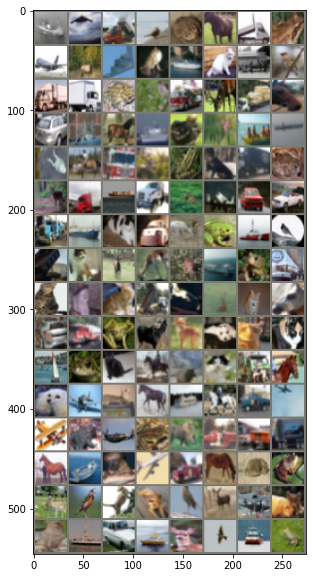

In [7]:
sample_data(train_loader, classes)

In [8]:
def print_summary(network,title):
  print(title)
  summary(network,input_size=(3,32,32))

In [9]:
device = get_device_type()
model = Net().to(device)
print_summary(model,'Network summary')

Network summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]              96
       BatchNorm2d-5           [-1, 32, 32, 32]              64
            Conv2d-6           [-1, 32, 32, 32]           9,216
              ReLU-7           [-1, 32, 32, 32]               0
       BatchNorm2d-8           [-1, 32, 32, 32]              64
            Conv2d-9           [-1, 32, 32, 32]              96
      BatchNorm2d-10           [-1, 32, 32, 32]              64
        MaxPool2d-11           [-1, 32, 16, 16]               0
           Conv2d-12           [-1, 64, 16, 16]          18,432
             ReLU-13           [-1, 64, 16, 16]               0
      BatchNorm2d-14   

In [10]:
EPOCHS = 15
device = get_device_type()
results = {}

models_dict = {'resnet18': {'model': model}
          }

lst_plottingJobs_val_acc = []
lst_plottingLegends_val_acc = []
lst_plottingJobs_loss = []
lst_plottingLegends_loss = []
results = start_training(EPOCHS, device, train_loader, test_loader, **models_dict)

  0%|          | 0/391 [00:00<?, ?it/s]


**** Started training ****


Model: resnet18

0 0
[EPOCH:0]


Loss=1.3875850439071655 Batch_id=390 Current_train_batch_accuracy=48.34: 100%|██████████| 391/391 [00:17<00:00, 22.11it/s]



Train set: Average loss: 1.1610, Accuracy: 29340/50000 (58.68%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2329, Accuracy: 5682/10000 (56.82%)

best_test_accuracy 56.82
[EPOCH:1]


Loss=0.8171398043632507 Batch_id=390 Current_train_batch_accuracy=65.53: 100%|██████████| 391/391 [00:17<00:00, 22.05it/s]



Train set: Average loss: 0.9044, Accuracy: 33975/50000 (67.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1393, Accuracy: 6379/10000 (63.79%)

best_test_accuracy 63.79
[EPOCH:2]


Loss=0.6591055393218994 Batch_id=390 Current_train_batch_accuracy=72.90: 100%|██████████| 391/391 [00:17<00:00, 22.36it/s]



Train set: Average loss: 0.6693, Accuracy: 38289/50000 (76.58%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7977, Accuracy: 7294/10000 (72.94%)

best_test_accuracy 72.94
[EPOCH:3]


Loss=0.6655146479606628 Batch_id=390 Current_train_batch_accuracy=76.80: 100%|██████████| 391/391 [00:17<00:00, 22.45it/s]



Train set: Average loss: 0.6099, Accuracy: 39305/50000 (78.61%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7666, Accuracy: 7424/10000 (74.24%)

best_test_accuracy 74.24
[EPOCH:4]


Loss=0.7271673083305359 Batch_id=390 Current_train_batch_accuracy=79.46: 100%|██████████| 391/391 [00:17<00:00, 22.77it/s]



Train set: Average loss: 0.5483, Accuracy: 40393/50000 (80.79%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6957, Accuracy: 7687/10000 (76.87%)

best_test_accuracy 76.87
[EPOCH:5]


Loss=0.586830735206604 Batch_id=390 Current_train_batch_accuracy=81.08: 100%|██████████| 391/391 [00:17<00:00, 22.57it/s]



Train set: Average loss: 0.5051, Accuracy: 41180/50000 (82.36%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6649, Accuracy: 7815/10000 (78.15%)

best_test_accuracy 78.15
[EPOCH:6]


Loss=0.4114057421684265 Batch_id=390 Current_train_batch_accuracy=82.52: 100%|██████████| 391/391 [00:17<00:00, 22.64it/s]



Train set: Average loss: 0.4683, Accuracy: 41868/50000 (83.74%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5718, Accuracy: 8063/10000 (80.63%)

best_test_accuracy 80.63
[EPOCH:7]


Loss=0.3549591302871704 Batch_id=390 Current_train_batch_accuracy=83.63: 100%|██████████| 391/391 [00:17<00:00, 22.24it/s]



Train set: Average loss: 0.4132, Accuracy: 42807/50000 (85.61%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5955, Accuracy: 8039/10000 (80.39%)

best_test_accuracy 80.63
[EPOCH:8]


Loss=0.40036505460739136 Batch_id=390 Current_train_batch_accuracy=84.90: 100%|██████████| 391/391 [00:17<00:00, 22.32it/s]



Train set: Average loss: 0.3974, Accuracy: 43134/50000 (86.27%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5379, Accuracy: 8198/10000 (81.98%)

best_test_accuracy 81.98
[EPOCH:9]


Loss=0.40943464636802673 Batch_id=390 Current_train_batch_accuracy=85.59: 100%|██████████| 391/391 [00:17<00:00, 22.00it/s]



Train set: Average loss: 0.3803, Accuracy: 43332/50000 (86.66%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5879, Accuracy: 8122/10000 (81.22%)

best_test_accuracy 81.98
[EPOCH:10]


Loss=0.4399639070034027 Batch_id=390 Current_train_batch_accuracy=86.02: 100%|██████████| 391/391 [00:17<00:00, 22.25it/s]



Train set: Average loss: 0.3657, Accuracy: 43616/50000 (87.23%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5287, Accuracy: 8272/10000 (82.72%)

best_test_accuracy 82.72
[EPOCH:11]


Loss=0.32553428411483765 Batch_id=390 Current_train_batch_accuracy=86.90: 100%|██████████| 391/391 [00:17<00:00, 22.12it/s]



Train set: Average loss: 0.3395, Accuracy: 44074/50000 (88.15%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5046, Accuracy: 8369/10000 (83.69%)

best_test_accuracy 83.69
[EPOCH:12]


Loss=0.3514319062232971 Batch_id=390 Current_train_batch_accuracy=87.40: 100%|██████████| 391/391 [00:17<00:00, 22.20it/s]



Train set: Average loss: 0.3426, Accuracy: 43980/50000 (87.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5968, Accuracy: 8111/10000 (81.11%)

best_test_accuracy 83.69
[EPOCH:13]


Loss=0.2984662353992462 Batch_id=390 Current_train_batch_accuracy=87.99: 100%|██████████| 391/391 [00:17<00:00, 22.09it/s]



Train set: Average loss: 0.3211, Accuracy: 44326/50000 (88.65%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5121, Accuracy: 8334/10000 (83.34%)

best_test_accuracy 83.69
[EPOCH:14]


Loss=0.25692087411880493 Batch_id=390 Current_train_batch_accuracy=88.72: 100%|██████████| 391/391 [00:17<00:00, 21.93it/s]



Train set: Average loss: 0.3036, Accuracy: 44616/50000 (89.23%)


Test set: Average loss: 0.5248, Accuracy: 8321/10000 (83.21%)

best_test_accuracy 83.69

results : {'resnet18': [[58.68, 67.95, 76.578, 78.61, 80.786, 82.36, 83.736, 85.614, 86.268, 86.664, 87.232, 88.148, 87.96, 88.652, 89.232], [1.1610062950134277, 0.9044260990905761, 0.6692550243377685, 0.6098845445251465, 0.5482502754211426, 0.5051370397949219, 0.4682631400680542, 0.4132454941940308, 0.3973813269805908, 0.38025367000579835, 0.3656616386413574, 0.3395344953918457, 0.34257745071411133, 0.3211377479171753, 0.3035612134933472], [56.82, 63.79, 72.94, 74.24, 76.87, 78.15, 80.63, 80.39, 81.98, 81.22, 82.72, 83.69, 81.11, 83.34, 83.21], [1.2329227466583252, 1.1392506465911865, 0.7976609104156495, 0.7666212737083435, 0.6957219514846802, 0.6649407021522522, 0.5718491164207459, 0.5955357333183289, 0.5378656580924988, 0.5879450770378113, 0.5286787873268127, 0.5045949754714966, 0.5967861025810242, 0.5120923406600952, 0.524827665

In [11]:
for model_type in results:
  lst_plottingJobs_val_acc.append(results[model_type][2])
  lst_plottingLegends_val_acc.append(model_type)
  lst_plottingJobs_loss.append(results[model_type][3])
  lst_plottingLegends_loss.append(model_type)


**** Started Plotting multigraph ****



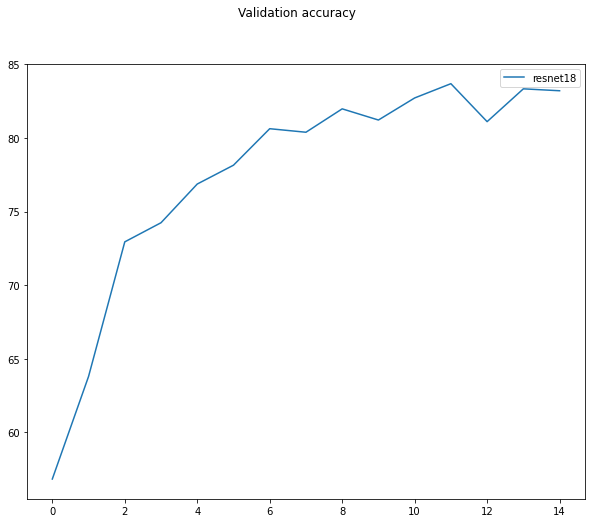


**** Ended Plotting multigraph ****



In [12]:
plot_multigraph(lst_plottingJobs_val_acc,lst_plottingLegends_val_acc,title="Validation accuracy")


**** Started Plotting multigraph ****



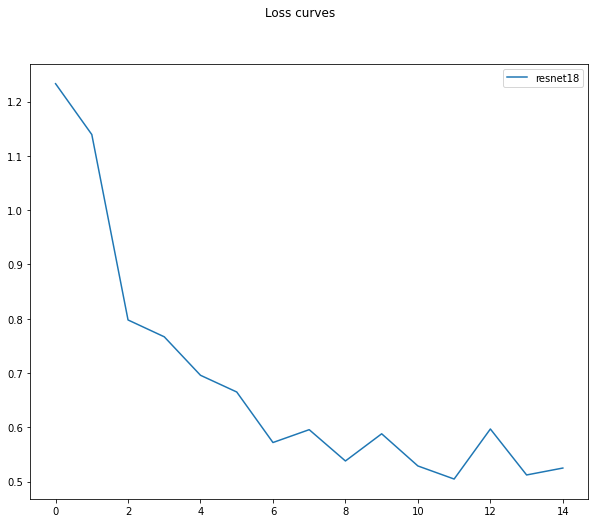


**** Ended Plotting multigraph ****



In [13]:
plot_multigraph(lst_plottingJobs_loss,lst_plottingLegends_loss,title="Loss curves")

In [14]:
display_classwise_accuracy(test_loader,device,model,classes)

Accuracy of plane : 80.0
Accuracy of car : 93.10344827586206
Accuracy of bird : 80.76923076923077
Accuracy of cat : 78.94736842105263
Accuracy of deer : 72.72727272727273
Accuracy of dog : 86.48648648648648
Accuracy of frog : 97.14285714285714
Accuracy of horse : 93.75
Accuracy of ship : 80.0
Accuracy of truck : 90.3225806451613
